<a href="https://colab.research.google.com/github/paras9o9/Lead-Scoring/blob/main/notebooks/Lead_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# %pip install streamlit

In [2]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

import joblib

import streamlit as st

In [3]:
df = pd.read_csv('/content/Lead Scoring (1).csv')
print(f"Shape: {df.shape}")
df.head()

Shape: (9240, 37)


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df['Converted'].value_counts(normalize=True)

,proportion
Converted,
0,0.61461
1,0.38539


In [5]:
df.drop(['Lead Number', 'Prospect ID'], axis=1, inplace=True)

In [6]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

,0
Lead Quality,51.590909
Asymmetrique Activity Index,45.649351
Asymmetrique Activity Score,45.649351
Asymmetrique Profile Score,45.649351
Asymmetrique Profile Index,45.649351
Tags,36.287879
What matters most to you in choosing a course,29.318182
Lead Profile,29.318182
What is your current occupation,29.112554
Country,26.634199


In [7]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,9137,6779,...,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,5,21,2,2,NaN,NaN,NaN,NaN,17,38,...,1,6,7,3,3,NaN,NaN,1,2,16
top,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,Email Opened,India,...,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,4886,2868,8506,9238,NaN,NaN,NaN,NaN,3437,6492,...,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


In [8]:
cols_to_drop = [
    'Lead Quality',
    'Asymmetrique Activity Index',
    'Asymmetrique Profile Index',
    'Asymmetrique Profile Score',
    'Asymmetrique Activity Score',
]

In [9]:
cat_impute_cols = [
    'Tags',
    'What matters most to you in choosing a course',
    'Lead Profile',
    'What is your current occupation',
    'Country',
    'How did you hear about X Education',
    'Specialization',
    'City'
]

In [10]:
num_impute_cols = ['Page Views Per Visit', 'TotalVisits']
cat_low_missing = ['Last Activity', 'Lead Source']

In [11]:
df.drop(columns=cols_to_drop, inplace=True)

for col in cat_impute_cols + cat_low_missing:
    if col in df.columns:
        df[col].fillna(df[col].mode()[0], inplace=True)

for col in num_impute_cols:
    if col in df.columns:
        df[col].fillna(df[col].median(), inplace=True)

print("Remaining missing values:", df.isnull().sum().sum())

Remaining missing values: 0


/tmp/ipython-input-11-1128795692.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-11-1128795692.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [12]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
print(f"Categorical Columns:\n{cat_cols}")

Categorical Columns:
['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [13]:
binary_map = {'Yes': 1, 'No': 0}
yes_no_cols = [col for col in cat_cols if df[col].dropna().isin(['Yes', 'No']).all()]

for col in yes_no_cols:
    df[col] = df[col].map(binary_map)

In [14]:
remaining_cat = list(set(cat_cols) - set(yes_no_cols))
df = pd.get_dummies(df, columns=remaining_cat, drop_first=True)

In [15]:
print("All columns are now numeric:", df.dtypes.value_counts())
df.head()

All columns are now numeric: bool       162
int64       16
float64      2
Name: count, dtype: int64


,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,...,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool
0,0,0,0,0.0,0,0.0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,0,0,0,5.0,674,2.5,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
2,0,0,1,2.0,1532,2.0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,False
3,0,0,0,1.0,305,1.0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
4,0,0,1,2.0,1428,1.0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False


In [16]:
num_cols_to_scale = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

scaler = StandardScaler()
df[num_cols_to_scale] = scaler.fit_transform(df[num_cols_to_scale])

df[num_cols_to_scale].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9.240000e+03,9.240000e+03,9.240000e+03
mean,3.998725e-17,2.499203e-17,-8.997132e-17
std,1.000054e+00,1.000054e+00,1.000054e+00
min,-7.135932e-01,-8.899736e-01,-1.098699e+00
25%,-5.060710e-01,-8.680755e-01,-6.326433e-01
50%,-9.102676e-02,-4.374121e-01,-1.665873e-01
75%,3.240175e-01,8.180811e-01,2.994687e-01
max,5.137446e+01,3.256074e+00,2.453438e+01


In [17]:
y = df['Converted']
x = df.drop('Converted', axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train shape: {X_train.shape}, Test Shape: {X_test.shape}")

Train shape: (7392, 179), Test Shape: (1848, 179)


In [18]:
X_train.isnull().sum().sort_values(ascending=False).head(10)

,0
Do Not Email,0
Do Not Call,0
TotalVisits,0
Total Time Spent on Website,0
Page Views Per Visit,0
Search,0
Magazine,0
Newspaper Article,0
X Education Forums,0
Newspaper,0


In [19]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

In [20]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [21]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgp = xgb.predict(X_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:23:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [22]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Results:")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

In [23]:
evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_rf)


Logistic Regression Results:
Accuracy : 0.9188311688311688
Precision: 0.8924581005586593
Recall: 0.8974719101123596
F1 Score: 0.8949579831932774

Confusion Matrix:
[[1059   77]
 [  73  639]]

Random Forest Results:
Accuracy : 0.9123376623376623
Precision: 0.8973988439306358
Recall: 0.8721910112359551
F1 Score: 0.8846153846153846

Confusion Matrix:
[[1065   71]
 [  91  621]]

XGBoost Results:
Accuracy : 0.9123376623376623
Precision: 0.8973988439306358
Recall: 0.8721910112359551
F1 Score: 0.8846153846153846

Confusion Matrix:
[[1065   71]
 [  91  621]]


In [24]:
importance = rf. feature_importances_
features = X_train.columns

feat_imp_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

/tmp/ipython-input-25-4068109280.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(20), palette='viridis')


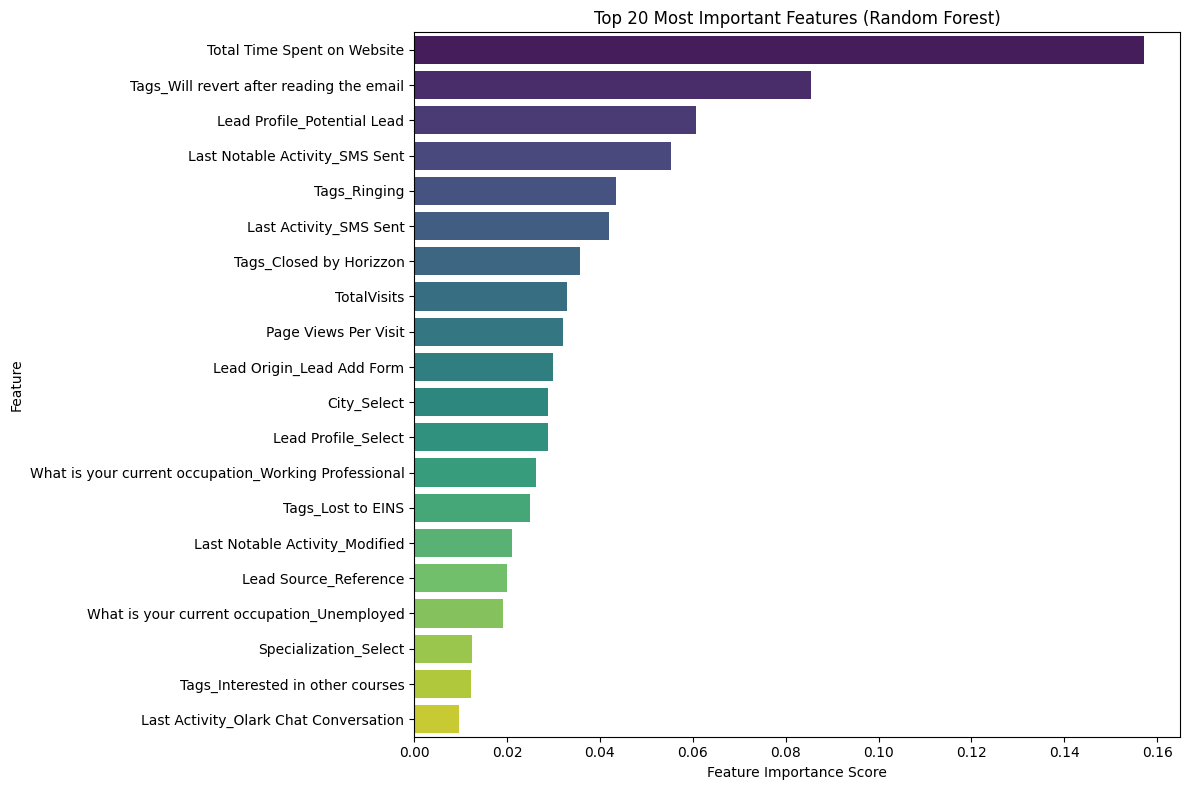

In [25]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(20), palette='viridis')
plt.title('Top 20 Most Important Features (Random Forest)')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [26]:
low_impact = feat_imp_df[feat_imp_df['Importance'] < 0.005]['Feature'].tolist()
X_reduced = X_train.drop(columns=low_impact)

In [27]:
y = df['Converted']

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

In [28]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

In [29]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [30]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgp = xgb.predict(X_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:23:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [31]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Results:")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

In [32]:
evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_rf)


Logistic Regression Results:
Accuracy : 0.9188311688311688
Precision: 0.8924581005586593
Recall: 0.8974719101123596
F1 Score: 0.8949579831932774

Confusion Matrix:
[[1059   77]
 [  73  639]]

Random Forest Results:
Accuracy : 0.9123376623376623
Precision: 0.8973988439306358
Recall: 0.8721910112359551
F1 Score: 0.8846153846153846

Confusion Matrix:
[[1065   71]
 [  91  621]]

XGBoost Results:
Accuracy : 0.9123376623376623
Precision: 0.8973988439306358
Recall: 0.8721910112359551
F1 Score: 0.8846153846153846

Confusion Matrix:
[[1065   71]
 [  91  621]]


In [33]:
import joblib

joblib.dump(logreg, "lead_scoring_model.pkl")
joblib.dump(X_reduced.columns.tolist(), "model_features.pkl")

['model_features.pkl']

In [37]:
model_features = joblib.load("model_features.pkl")
sample = pd.DataFrame(columns=model_features)
sample.loc[0] = [0] * len(model_features)
sample.to_csv("sample_leads.csv", index=False)

In [38]:
from google.colab import files

# files.download("lead_scoring_model.pkl")
# files.download("model_features.pkl")
# files.download("sample_leads.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>